# Important Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Boosting

## Gradient Boosting

Training MSE: 0.26
Test MSE: 0.29
Training R^2: 0.81
Test R^2: 0.78


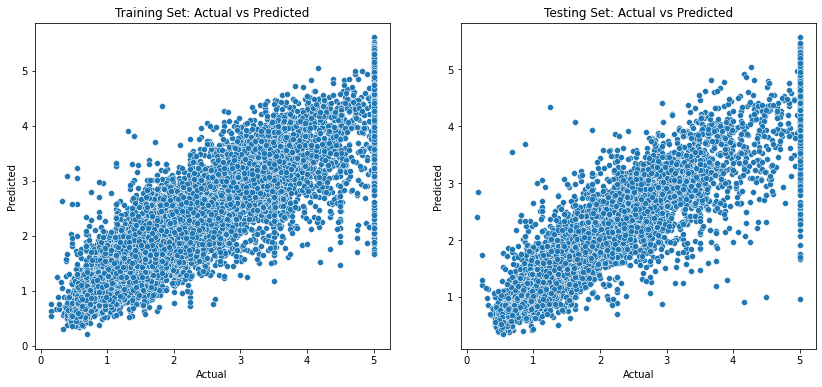

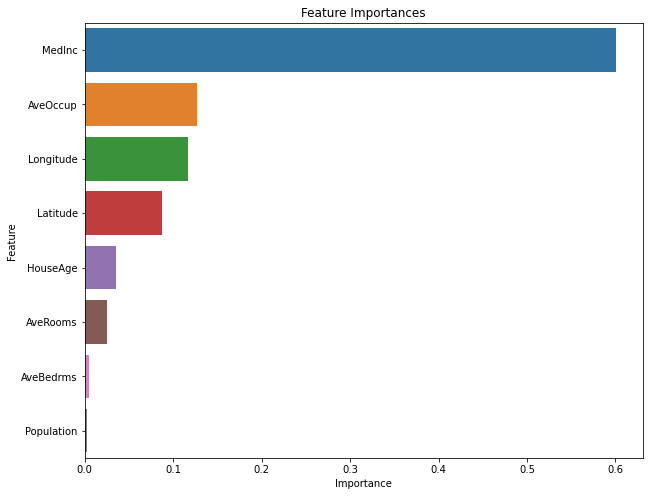

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')

# Plotting predictions vs actual values
plt.figure(figsize=(14, 6))

# Training set predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')

# Testing set predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Set: Actual vs Predicted')

plt.show()

# Plot feature importances
feature_importances = gbr.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


## XGBoost

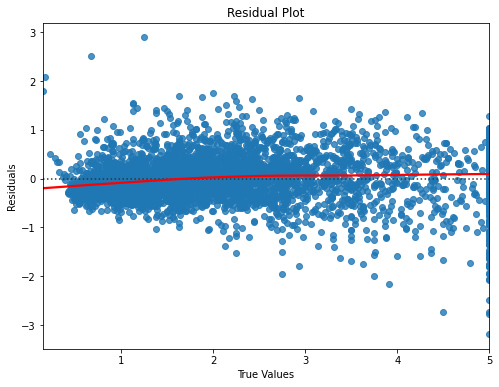

Mean Squared Error: 0.29522676196268116
R-squared: 0.7747063955872805
Classification Report (Price Categories):
               precision    recall  f1-score   support

           0       0.01      0.02      0.01       579
           1       0.10      0.08      0.09      2031
           2       0.09      0.02      0.03      1518

    accuracy                           0.05      4128
   macro avg       0.06      0.04      0.04      4128
weighted avg       0.08      0.05      0.05      4128



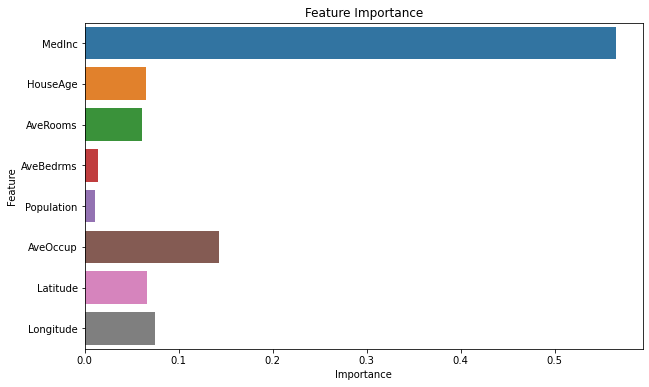

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, classification_report

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Data Preprocessing
# Create bins for house prices and assign labels (for classification report)
data['PriceCategory'] = pd.cut(data['MedHouseVal'], bins=3, labels=['Low', 'Medium', 'High'])

# Convert the categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
data['PriceCategory'] = le.fit_transform(data['PriceCategory'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(['MedHouseVal', 'PriceCategory'], axis=1)
y = data['MedHouseVal']
y_cat = data['PriceCategory']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, y_cat_train, y_cat_test = train_test_split(
    X, y, y_cat, test_size=0.2, random_state=42
)

# Train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Convert the predicted values to categorical for the classification report
y_pred_cat = pd.cut(y_pred, bins=3, labels=False)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Print the classification report for predicted price categories
print("Classification Report (Price Categories):\n", classification_report(y_cat_test, y_pred_cat))

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Adaboost

Training Accuracy: 1.00
Test Accuracy: 0.98

Classification Report:

              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



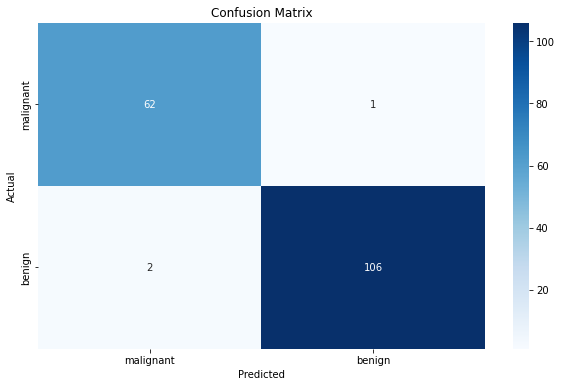

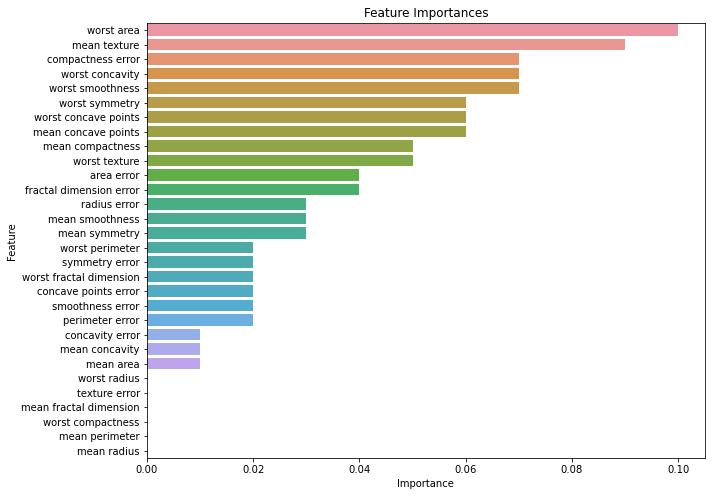

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

# Predictions
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=data.target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
feature_importances = ada_clf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


## LightGBM


In [5]:
# !pip install lightgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.480889
Mean Squared Error: 0.23125380212831073
R-squared: 0.8235254748950613
Classification Report (Price Categories):
               precision    recall  f1-score   support

           0       0.01      0.03      0.01       579
           1       0.06      0.04      0.05      2031
           2       0.11      0.03      0.05      1518

    accuracy                           0.03      4128
   macro avg       0.06      0.03      0.04      4128
weighted avg       0.07      0.03      0.04      4128



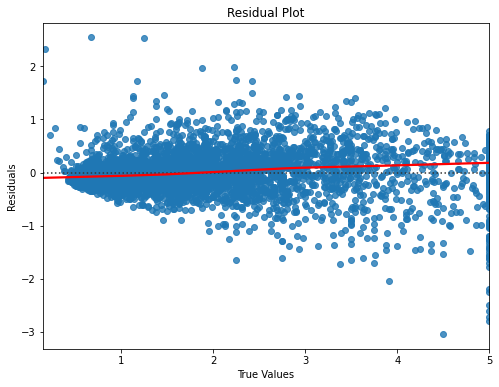

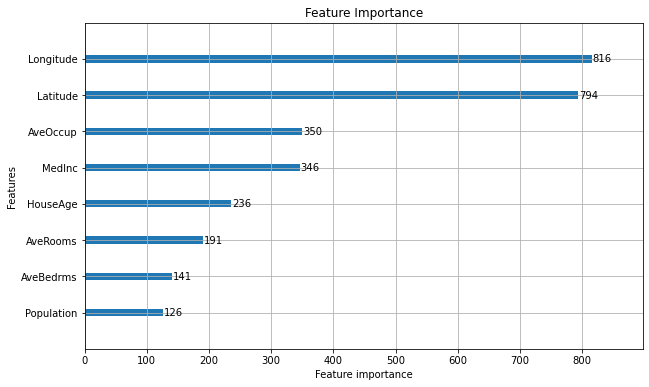

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Create bins for house prices and assign labels (for classification report)
data['PriceCategory'] = pd.cut(data['MedHouseVal'], bins=3, labels=['Low', 'Medium', 'High'])

# Convert the categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
data['PriceCategory'] = le.fit_transform(data['PriceCategory'])

# Split the dataset into features (X) and target variables (y and y_cat)
X = data.drop(['MedHouseVal', 'PriceCategory'], axis=1)
y = data['MedHouseVal']
y_cat = data['PriceCategory']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, y_cat_train, y_cat_test = train_test_split(X, y, y_cat, test_size=0.2, random_state=42)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Callback function for early stopping
early_stopping_rounds = 5
def early_stopping_callback(env):
    if env.evaluation_result_list[1][1] < env.best_score + 0.001:  # Check validation RMSE
        return True
    return False

# Train the LightGBM model with early stopping callback
model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds)]
)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Convert the predicted values to categorical for the classification report
y_pred_cat = pd.cut(y_pred, bins=3, labels=False)

# Print the classification report for predicted price categories
print("Classification Report (Price Categories):\n", classification_report(y_cat_test, y_pred_cat))


# Visualizations
# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

# Feature Importance Plot
lgb.plot_importance(model, figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


# Stacking


## Stacking using Sklearn

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



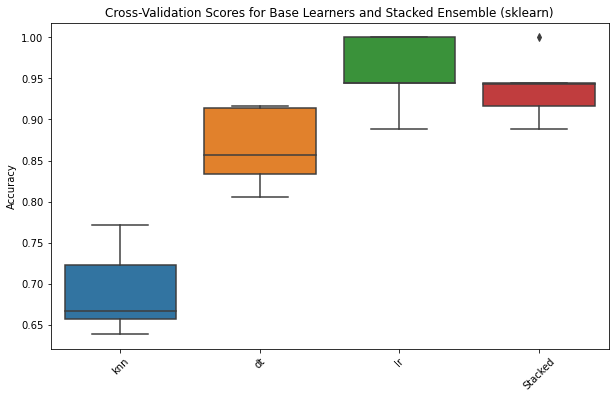

Final Stacking Classifier Accuracy (sklearn): 0.94


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target
X = pd.DataFrame(X, columns=data.feature_names)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners (Level-0 Models)
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression())
]

# Define the meta-learner (Level-1 Model)
final_estimator = SVC()

# Create the StackingClassifier using sklearn
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

# Train the StackingClassifier
clf.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)

# Get cross-validation scores for each base learner and the stacked ensemble
cv_scores = []
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores)
cv_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores)
plt.xticks(range(len(estimators) + 1), [est[0] for est in estimators] + ["Stacked"], rotation=45)
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Base Learners and Stacked Ensemble (sklearn)')
plt.show()

# Print the final accuracy of the stacked ensemble
print(f"Final Stacking Classifier Accuracy (sklearn): {accuracy:.2f}")


## Stacking using MLXtend

https://rasbt.github.io/mlxtend/

In [8]:
# ! pip install mlxtend

Classification Report:
               precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



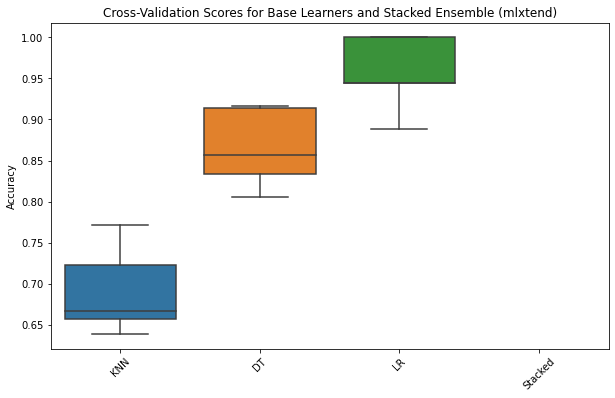

Final Stacking Classifier Accuracy (mlxtend): 0.94


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.classifier import StackingClassifier

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target
X = pd.DataFrame(X, columns=data.feature_names)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners (Level-0 Models)
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = LogisticRegression()

# Define the meta-learner (Level-1 Model)
meta_clf = SVC(probability=True)  # Ensure SVC can output probabilities

# Create the StackingClassifier using mlxtend
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=meta_clf)

# Train the StackingClassifier
sclf.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred = sclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)

# Get cross-validation scores for each base learner and the stacked ensemble
cv_scores = []
for clf in [clf1, clf2, clf3]:
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores)
cv_scores.append(cross_val_score(sclf, X, y, cv=5, scoring='accuracy'))

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores)
plt.xticks(range(len([clf1, clf2, clf3]) + 1), ['KNN', 'DT', 'LR', 'Stacked'], rotation=45)
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Base Learners and Stacked Ensemble (mlxtend)')
plt.show()

# Print the final accuracy of the stacked ensemble
print(f"Final Stacking Classifier Accuracy (mlxtend): {accuracy:.2f}")


# Cascading

In [13]:
# Downloading the dataset
# You will have to manually download the file and pass the path in the read_csv function.
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

! gdown 1l9V3JaTkobNGe2HbHExVlHCZdw8890Pl

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1l9V3JaTkobNGe2HbHExVlHCZdw8890Pl 



Cascade Ensemble Model:
Accuracy: 0.9996664442961974

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.82      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



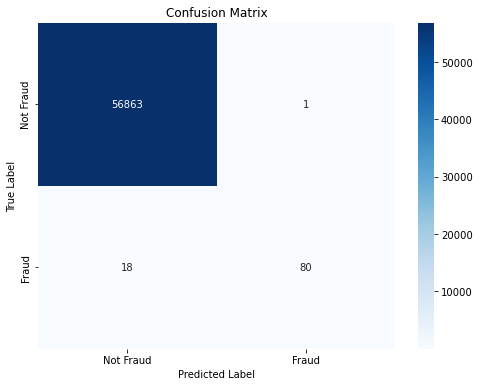

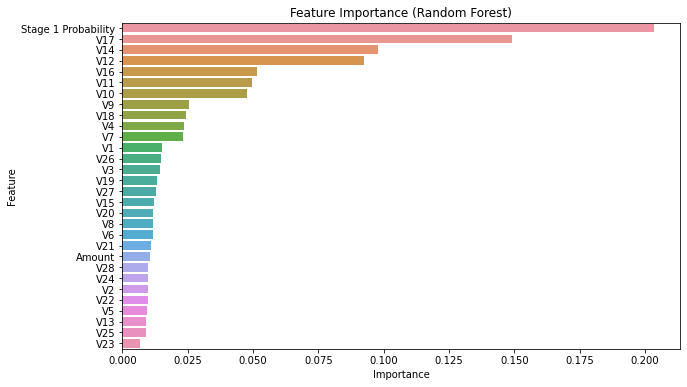

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the credit card fraud dataset 
data = pd.read_csv("creditcard.csv")
data = data.fillna(0)

# Preprocess the data
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stage 1: Simple Logistic Regression
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_train)

# Add predicted probabilities from Stage 1 as new features
X_train_stage2 = np.column_stack((X_train, clf1.predict_proba(X_train)[:, 1]))

# Stage 2: Random Forest (with additional features)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train_stage2, y_train)

# Prediction on test set (cascading through both stages)
y_pred_test_stage1 = clf1.predict(X_test)
X_test_stage2 = np.column_stack((X_test, clf1.predict_proba(X_test)[:, 1]))
y_pred_final = clf2.predict(X_test_stage2)

# Evaluation
print("Cascade Ensemble Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# Confusion Matrix (Seaborn Heatmap)
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Feature Importance Plot (for Random Forest)
importances = clf2.feature_importances_
feature_names = list(X.columns) + ["Stage 1 Probability"]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
